In [ ]:
import matplotlib.pyplot as plt
import json
from anaysis import analysis, analysis_v2
def get_avg_reward(log_path, file_folder, version="v1", round_cut=-1):
    file_template = f"{log_path}/{file_folder}" + "/agent_incident_{0}.json"

    total_count = 0
    total_reward = 0

    incidents = [5, 34, 38, 39, 55, 134, 166, 322]
    for i in incidents:
        with open(file_template.format(i), "r") as f:
            data = json.load(f)

        if version == "v2":
            result = analysis_v2(data, round_cut=round_cut)
        else:
            result = analysis(data, round_cut=round_cut)

        total_count += result['total_len']
        total_reward += result['total_reward']

    avg_accuracy = round(total_reward / total_count, 3)
    return avg_accuracy

baselines = {
  "gpt-4o-mini": "BaselineAgent_4o-mini_c71_alert_level_t0_s25_trial1",
  "gpt-4o": "BaselineAgent_gpt-4o_c70_alert_level_t0_s25_trial1",
  "gemini-2.5-flash": ("BaselineAgent_gemini-2.5-flash_c6000_alert_level_t0_s25_trial1", "v2"),

  "o1-mini": ("BaselineAgent_o1-mini_c92_alert_level_t0_s25_trial1", "v2"),
  "phi-4": ("BaselineAgent_phi4_c469_alert_level_t0_s25_trial1", "v2"),
#   "deepseek-r1": ("BaselineAgent_r1_c468_alert_level_t0_s25_trial1", "v2"),
  "gpt-4.1": ("BaselineAgent_gpt-4.1_c1001_alert_level_t0_s25_trial1", "v2"),
  "gpt-4.1-nano": ("BaselineAgent_gpt-4.1-nano_c3002_alert_level_t0_s25_trial1", "v2"),
  "llama-4-mav": ("BaselineAgent_llama4-Mav-17b_c7003_alert_level_t0_s25_trial1", "v2"),
  "llama-4-scout": ("BaselineAgent_llama4-Scout-17b_c7005_alert_level_t0_s25_trial1", "v2"),
  "gpt-4.1-mini": ("BaselineAgent_gpt-4.1-mini_c2001_alert_level_t0_s25_trial1", "v2"),
  "o3-mini": ("BaselineAgent_o3-mini_c99_alert_level_t0_s25_trial1", "v2"),
  "qwen-3-32b": ("BaselineAgent_qwen3-32b_c8200_alert_level_t0_s25_trial1", "v2"),

  "o4-mini": ("BaselineAgent_o4-mini_c4003_alert_level_t0_s25_trial1", "v2"),
}


log_path = "../secgym/final_results"
results = {}

round_results = {}
for name, b in baselines.items():
    if isinstance(b, tuple):
        file_folder, version = b # v2
    else:
        file_folder = b
        version = "v1"

    for r in [5, 10, 15, 20, 25]:
        avg_reward = get_avg_reward(log_path, file_folder, version=version, round_cut=r)
        if name not in round_results:
            round_results[name] = []
        round_results[name].append(avg_reward)

Error calculating usage: usage summary None
Error calculating usage: usage summary None
Error calculating usage: usage summary None
Error calculating usage: usage summary None
Error calculating usage: usage summary None
Error calculating usage: usage summary {}
Error calculating usage: usage summary {}
Error calculating usage: usage summary {}
Error calculating usage: usage summary {}
Error calculating usage: usage summary {}


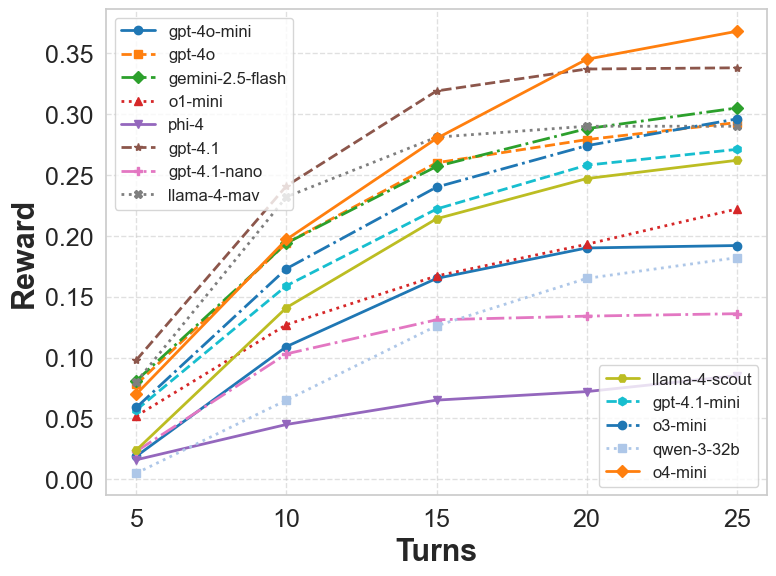

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
GLOBAL_FONT_SCALE = 1.2
GLOBAL_FONT_SIZE = 18
LINE_WIDTH = 2
MARKER_SIZE = 6
LEGEND_FONT_SIZE = 12
ANNOTATION_FONT_SIZE = 12
PLOT_PALETTE = sns.color_palette("tab10")  # Consistent palette
# add more colors
PLOT_PALETTE += sns.color_palette("tab20")  # Add more colors from tab20

# results['gemini-2.5-flash'] = results.pop("gemini")
def plot_turns_vs_reward(model_rewards: dict, steps: list, output_filename: str):
    """
    Plots the relation between the number of interaction turns and rewards for different models,
    with two separate legends (upper-left and lower-right).
    """
    sns.set(style="whitegrid", font_scale=GLOBAL_FONT_SCALE)
    fig, ax = plt.subplots(figsize=(8, 6))

    markers = ['o', 's', 'D', '^', 'v', '*', 'P', 'X', 'H', 'h']
    linestyles = ['-', '--', '-.', ':']
    colors = PLOT_PALETTE

    # Plot all your lines
    for i, (model, rewards) in enumerate(model_rewards.items()):
        ax.plot(
            steps,
            rewards,
            marker=markers[i % len(markers)],
            linestyle=linestyles[i % len(linestyles)],
            color=colors[i % len(colors)],
            linewidth=LINE_WIDTH,
            markersize=MARKER_SIZE,
            label=model
        )

    ax.set_xlabel("Turns", fontsize=GLOBAL_FONT_SIZE+4, weight="bold")
    ax.set_ylabel("Reward", fontsize=GLOBAL_FONT_SIZE+4, weight="bold")
    ax.set_xticks(steps)
    ax.tick_params(labelsize=GLOBAL_FONT_SIZE)

    # Grab all handles & labels
    handles, labels = ax.get_legend_handles_labels()

    # Split them into two groups however you like;
    # here we just split the list in half
    mid = len(handles) // 2
    mid +=2
    h1, l1 = handles[:mid], labels[:mid]
    h2, l2 = handles[mid:], labels[mid:]

    # First legend at upper left
    legend1 = ax.legend(
        h1, l1,
        loc="upper left",
        fontsize=LEGEND_FONT_SIZE,
        frameon=True
    )
    # Tell Axes to keep the first legend when drawing the second
    ax.add_artist(legend1)

    # Second legend at lower right
    ax.legend(
        h2, l2,
        loc="lower right",
        fontsize=LEGEND_FONT_SIZE,
        frameon=True
    )

    ax.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.savefig(output_filename, format="pdf", bbox_inches="tight")
    plt.show()

# Example usage:
steps = [5, 10, 15, 20, 25]
plot_turns_vs_reward(round_results, steps, "plots/full_reward_vs_turns.pdf")
